In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from math import sqrt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std



plt.rc("axes.spines", top=False, right=False)

#import our scripts that do data science workflow
import wrangle
import split_scale

In [2]:
from env import host, user, password

In [3]:
df=wrangle.get_data_from_mysql()
df=df.drop('id', axis = 1)
df=df.drop('propertylandusetypeid', axis= 1)
df = df.drop('propertylandusedesc', axis =1)
df = df.rename(columns={"bedroomcnt": "bedrooms", "bathroomcnt": "bathrooms", "calculatedfinishedsquarefeet": "squarefeet", 'taxvaluedollarcnt':'tax'})

In [27]:
df= df.dropna(axis=0)

In [28]:
df.head()

,bedrooms,bathrooms,tax,squarefeet
0,3.0,1.0,305481.0,1136.0
1,3.0,2.0,418694.0,2104.0
2,2.0,1.0,169843.0,872.0
3,3.0,1.0,194005.0,1190.0
4,3.0,2.0,288259.0,1534.0


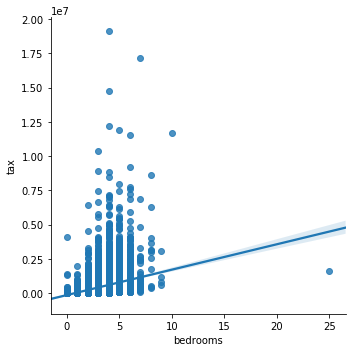

In [29]:
sns.lmplot(x='bedrooms',y='tax',data=df)

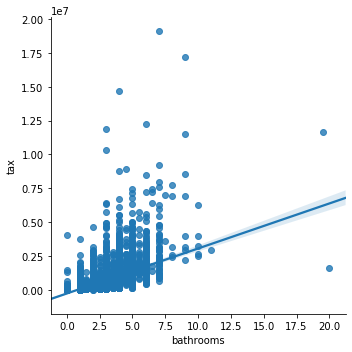

In [30]:
sns.lmplot(x='bathrooms',y='tax',data=df)

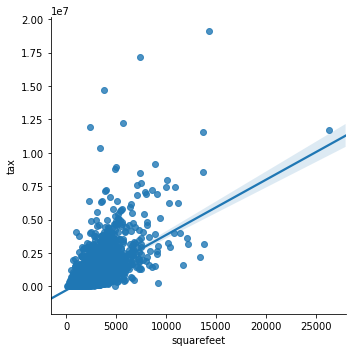

In [31]:
sns.lmplot(x='squarefeet',y='tax',data=df)

In [32]:
y = df[['tax']]
X= df[['bedrooms', 'bathrooms', 'squarefeet']]

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm = LinearRegression()

In [37]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-142746.02338171   51911.59006752     465.16156529]]


In [39]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

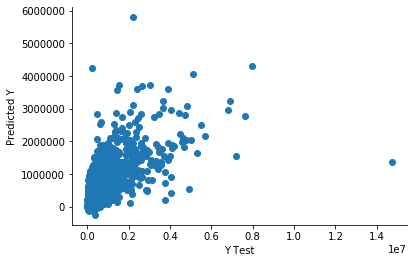

In [40]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [41]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 257350.2715121063
MSE: 222505641849.84988
RMSE: 471705.0369138005


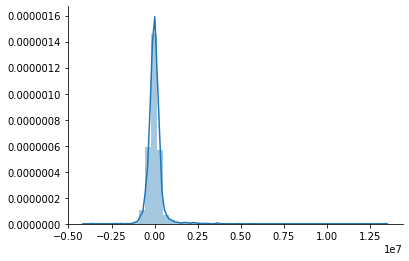

In [42]:
sns.distplot((y_test-predictions),bins=50);

In [43]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

ValueError: Shape of passed values is (1, 3), indices imply (3, 3)